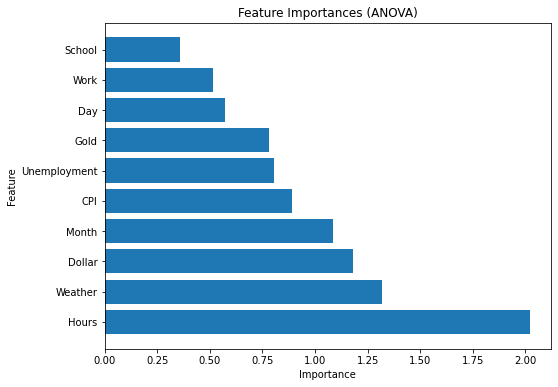

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Read the Excel file into a DataFrame
df = pd.read_excel("satisverileri.xlsx")

# Drop rows with missing values
new_df = df.dropna()

# Separate the features (independent variables) and the target variable
X = new_df.drop(["Sales"], axis=1)
y = new_df["Sales"]

# Create an instance of the SelectKBest class with the ANOVA (f_classif) scoring function
k = 5  # Set the number of features you want to select
selector = SelectKBest(score_func=f_classif, k=k)

# Apply feature selection to the dataset
X_selected = selector.fit_transform(X, y)

# Get the importances of the selected features
feature_importances = selector.scores_

# Get the names of all features
all_feature_names = X.columns

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({"Feature": all_feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values("Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances (ANOVA)")
plt.show()